# 📝 Exercise M6.03

The aim of this exercise is to:

* verifying if a random forest or a gradient-boosting decision tree overfit
  if the number of estimators is not properly chosen;
* use the early-stopping strategy to avoid adding unnecessary trees, to
  get the best generalization performances.

We will use the California housing dataset to conduct our experiments.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a gradient boosting decision tree with `max_depth=5` and
`learning_rate=0.5`.

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(max_depth=5, learning_rate=0.5)


Also create a random forest with fully grown trees by setting `max_depth=None`.

In [3]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=None)



For both the gradient-boosting and random forest models, create a validation
curve using the training set to assess the impact of the number of trees on
the performance of each model. Evaluate the list of parameters `param_range =
[1, 2, 5, 10, 20, 50, 100]` and use the mean absolute error.

In [13]:
from sklearn.model_selection import validation_curve
param_range=[1, 2, 5, 10, 20, 50, 100]
boost_train_scores, boost_val_scores = validation_curve(
    boost, 
    data_train, 
    target_train, 
    param_name='n_estimators', 
    param_range=param_range, 
    scoring='neg_mean_absolute_error', 
    n_jobs=2)

In [29]:
boost_train_errors,  boost_val_errors = -boost_train_scores, -boost_val_scores

In [32]:
forest_train_scores, forest_val_scores = validation_curve(
    forest, 
    data_train, 
    target_train, 
    param_name='n_estimators', 
    param_range=[1, 2, 5, 10, 20, 50, 100], 
    scoring='neg_mean_absolute_error', 
    n_jobs=2)

forest_train_errors,  forest_val_errors = -forest_train_scores, -forest_val_scores


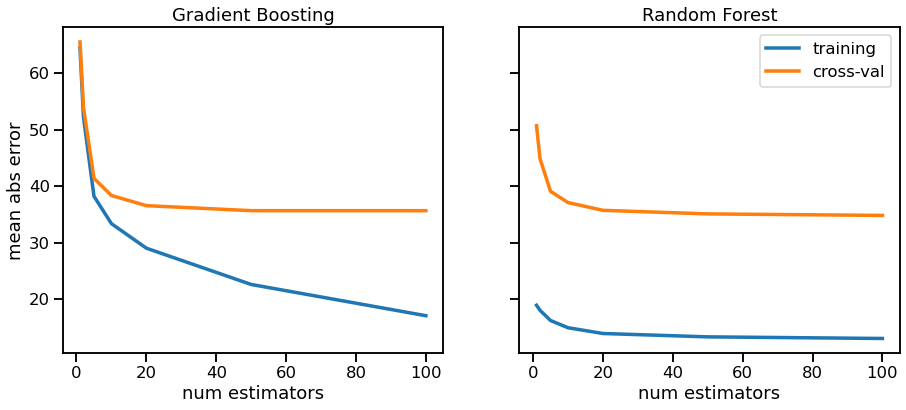

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols = 2, figsize=(15,6), sharey=True)

axs[0].plot(param_range, boost_train_errors.mean(axis=1))
axs[0].plot(param_range, boost_val_errors.mean(axis=1))
axs[0].set_title('Gradient Boosting')
axs[0].set_ylabel("mean abs error")
axs[0].set_xlabel("num estimators")


axs[1].plot(param_range, forest_train_errors.mean(axis=1), label='training')
axs[1].plot(param_range, forest_val_errors.mean(axis=1),label='cross-val')
axs[1].set_title('Random Forest')
axs[1].set_xlabel("num estimators")


plt.legend()

Both gradient boosting and random forest models will always improve when
increasing the number of trees in the ensemble. However, it will reach a
plateau where adding new trees will just make fitting and scoring slower.

To avoid adding new unnecessary tree, unlike random-forest gradient-boosting
offers an early-stopping option. Internally, the algorithm will use an
out-of-sample set to compute the generalization performance of the model at
each addition of a tree. Thus, if the generalization performance is not
improving for several iterations, it will stop adding trees.

Now, create a gradient-boosting model with `n_estimators=1_000`. This number
of trees will be too large. Change the parameter `n_iter_no_change` such
that the gradient boosting fitting will stop after adding 5 trees that do not
improve the overall generalization performance.

In [39]:
boost_1k = GradientBoostingRegressor(n_estimators=1_000, n_iter_no_change=5)

Estimate the generalization performance of this model again using
the `sklearn.metrics.mean_absolute_error` metric but this time using
the test set that we held out at the beginning of the notebook.
Compare the resulting value with the values observed in the validation
curve.

In [47]:
from sklearn.metrics import mean_absolute_error
boost_1k.fit(data_train, target_train)
y_pred = boost_1k.predict(data_test)
print(f"model predicted with error of {mean_absolute_error(target_test, y_pred):.2f} and " 
f"used {boost_1k.n_estimators_} estimators (much lower than 1000)")

model predicted with error of 34.23 and used 264 estimators (much lower than 1000)
